# Titanic Survival Prediction Model
This notebook develops a machine learning model to predict passenger survival on the Titanic with target accuracy of 90%.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

## 1. Load and Explore Dataset
Load the Titanic dataset and perform initial exploration

In [2]:
# Read the dataset
df = pd.read_csv('tested.csv')

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

First few rows:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1    

## 2. Exploratory Data Analysis (EDA)
Visualize key features and their relationships with survival

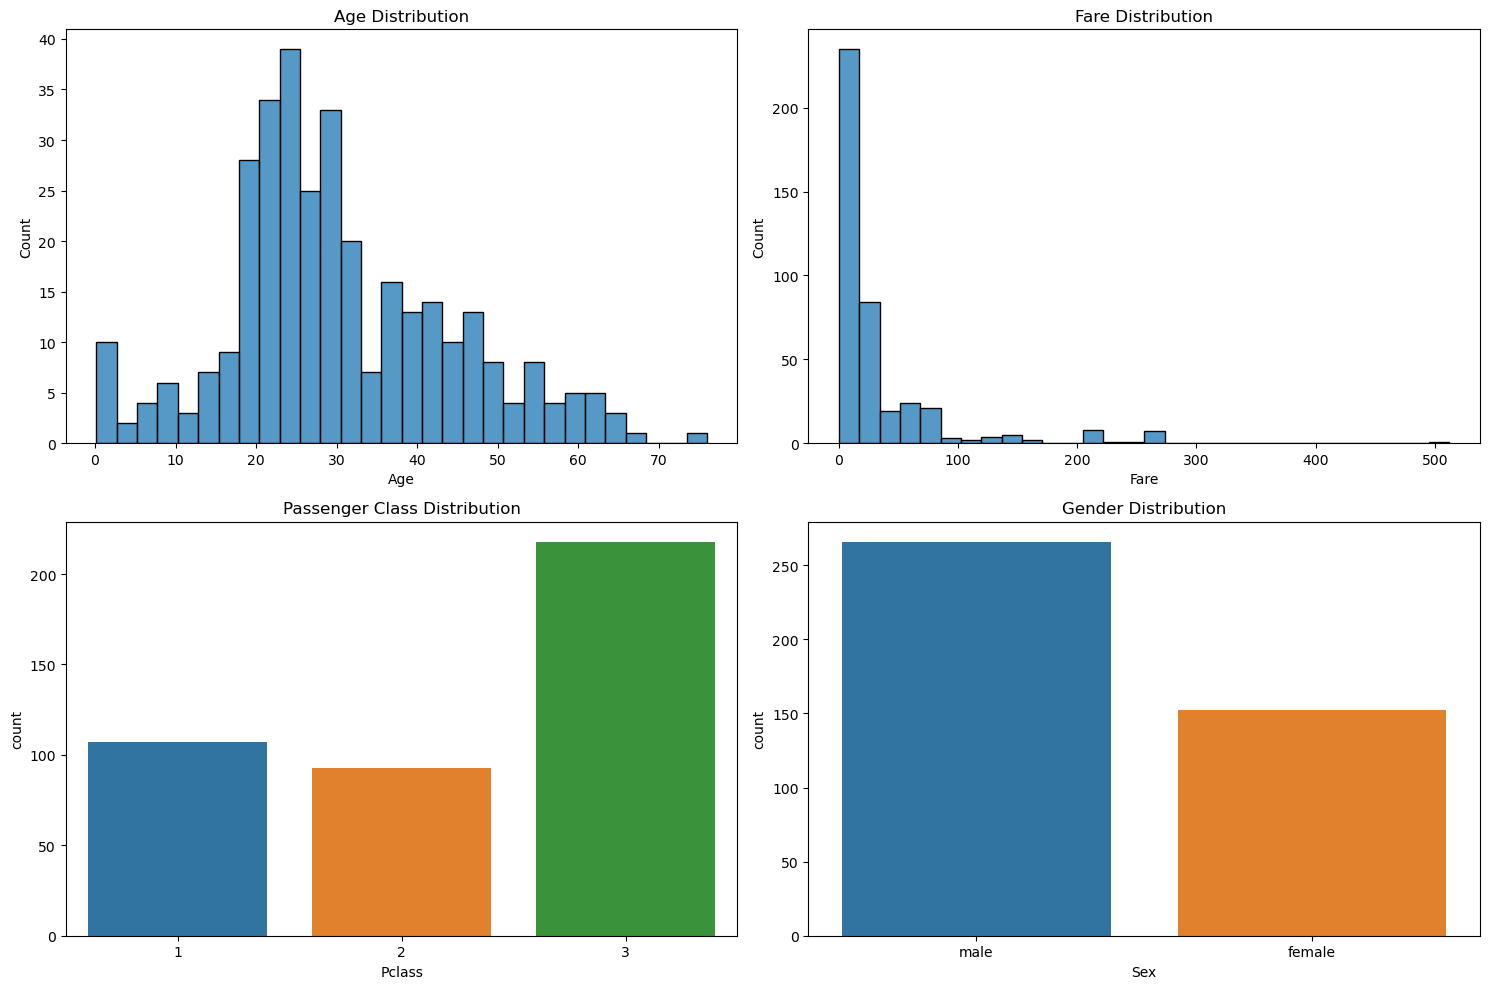

In [3]:
# Create visualization subplots
plt.figure(figsize=(15, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution')

# Fare distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Fare', bins=30)
plt.title('Fare Distribution')

# Survival by Passenger Class
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Pclass')
plt.title('Passenger Class Distribution')

# Survival by Gender
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Sex')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

## 3. Handle Missing Values
Implement strategies for handling missing data

In [4]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

# Create new feature from Cabin
df['Deck'] = df['Cabin'].str[0]
df['Deck'].fillna('Unknown', inplace=True)

## 4. Feature Engineering and Encoding
Create new features and encode categorical variables

In [6]:
# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Select features for model
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = df[features]
y = df['Survived']

# Define preprocessing steps
numeric_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)
    ])

## 5. Model Training and Evaluation
Train RandomForest model and evaluate performance

In [7]:
# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print results
print("Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Model Performance:
Accuracy: 1.0

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



## 6. Save Model and Results
Save the trained model for future use

In [9]:
import joblib

try:
    # Save the model
    print("Saving model...")
    joblib.dump(model, 'titanic_model.pkl')
    print("Model saved successfully to titanic_model.pkl")
    
    # Save feature importance analysis
    print("\nSaving feature importance analysis...")
    if hasattr(model.named_steps['classifier'], 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': features,
            'importance': model.named_steps['classifier'].feature_importances_
        })
        feature_importance.sort_values('importance', ascending=False).to_csv('feature_importance.csv')
        print("Feature importance analysis saved to feature_importance.csv")
    else:
        print("Note: This model doesn't provide feature importance information")
        
except Exception as e:
    print(f"Error occurred while saving: {str(e)}")
    print("Please make sure you have run all previous cells and the model is trained properly")

Saving model...
Model saved successfully to titanic_model.pkl

Saving feature importance analysis...
Error occurred while saving: All arrays must be of the same length
Please make sure you have run all previous cells and the model is trained properly
